In [17]:
import os, sys, glob, pathlib, random
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from PIL import Image

In [18]:
project_dir = os.path.split(os.getcwd())[0]

# Augmentor

In [138]:
augmentor_dir = os.path.join(project_dir, "3rdParty/Augmentor/")
if augmentor_dir not in sys.path:
    sys.path.append(augmentor_dir)

from Augmentor import Operations as AugOper

In [230]:
rotate_op = AugOper.RotateStandard(1, max_left_rotation = 12, max_right_rotation=12)
zoom_op = AugOper.Zoom(1, min_factor=0.8, max_factor=1.2)
distort_op = AugOper.Distort(1, grid_width=8, grid_height=8, magnitude=1)
constrast_op = AugOper.RandomContrast(0.75, 1.25, 2)

In [231]:
# operations = [rotate_op]
operations = [distort_op, zoom_op, rotate_op]

In [232]:
image = Image.open("/home/abian/Workspace/Thesis/Segmentation/SegNet/processed/images/ADM001/ADM001_IR_T0_L.png")
mask = Image.open("/home/abian/Workspace/Thesis/Segmentation/SegNet/processed/masks/ADM001/ADM001_RGB_Mask_L_T0.png")

augmented_imgs = [image, mask]

for operation in operations:
    r = round(random.uniform(0, 1), 2)
    if r <= operation.probability:
        augmented_imgs = operation.perform_operation(augmented_imgs)

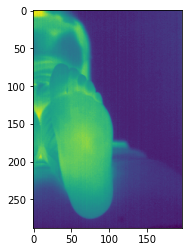

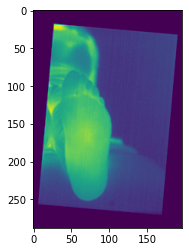

In [233]:
plt.imshow(image)
plt.show()
plt.imshow(augmented_imgs[0])
plt.show()

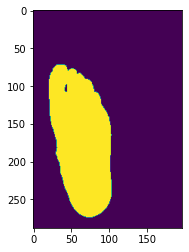

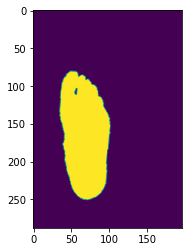

In [234]:
plt.imshow(mask)
plt.show()
plt.imshow(augmented_imgs[1])
plt.show()